In [ ]:
import pandas as pd
file1 = pd.read_csv('payments_main.tsv', sep='\t')
file2 = pd.read_csv('payments_training.tsv', sep='\t')

In [ ]:
file1.head()

,1,07.11.2024,40500.00,За тур.поездку по договору №001 от 27.01.2023г
0,2,07.11.2024,"32600,00",За оказание услуг по договору №53Б-02746 от 23...
1,3,07.11.2024,4710-00,Оплата штрафа
2,4,07.11.2024,30900-00,Лечение по договору №Д-00359/24 от 08.03.2025
3,5,07.11.2024,13200.00,Оплата основного долга за период с 16.12.2024г...
4,6,07.11.2024,4210.00,Оплата за Бульон Роллтон Домашний куриный 90г ...


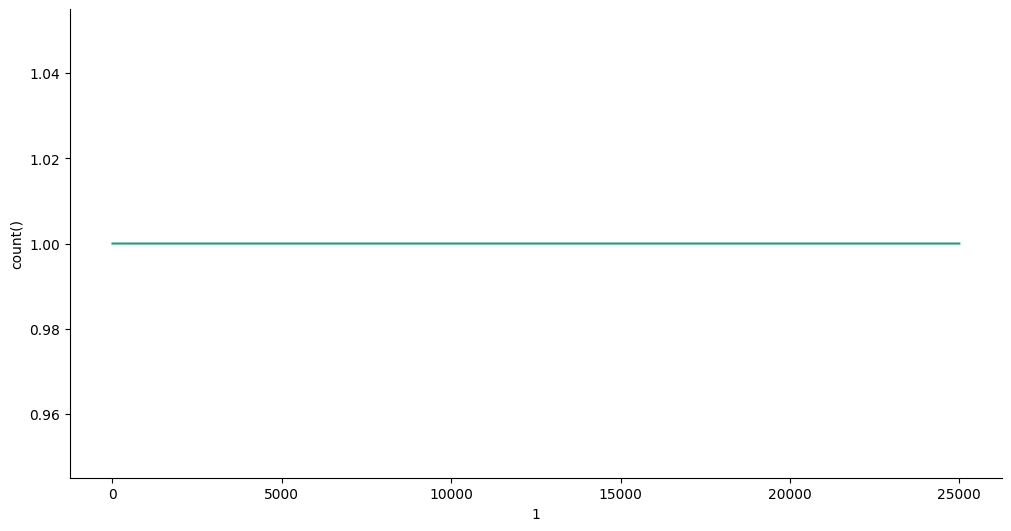

In [ ]:
# @title 1 vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['1']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '1'}, axis=1)
              .sort_values('1', ascending=True))
  xs = counted['1']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = file1.sort_values('1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('1')
_ = plt.ylabel('count()')

In [ ]:
file2.head()

,1,07.11.2024,15300.00,За участие в конференции в г. Майкоп по договору 88.367840-ДВ от 11 апреля 2026,SERVICE
0,2,07.11.2024,"40200,00",За оказание услуг по договору №79-02726В от 01...,SERVICE
1,3,07.11.2024,1440-00,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS
2,4,07.11.2024,240000000-00,Возврат денежных средств по договору займа №04...,LOAN
3,5,07.11.2024,1360000.00,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED
4,6,07.11.2024,"1820000,00",Оплата по дог.финансовой аренды №Б00358 от 30....,LEASING


In [ ]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   1                                                                                499 non-null    int64 
 1   07.11.2024                                                                       499 non-null    object
 2   15300.00                                                                         499 non-null    object
 3   За участие в конференции в г. Майкоп по договору 88.367840-ДВ от 11 апреля 2026  499 non-null    object
 4   SERVICE                                                                          499 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.6+ KB


In [ ]:
def rename_columns(df):
    # Получаем количество столбцов
    num_columns = df.shape[1]

    # Проверяем, чтобы в DataFrame было достаточно колонок
    if num_columns < 4:
        raise ValueError("DataFrame должен содержать хотя бы 3 колонки для переименования.")

    # Задаём новые имена для первых трёх колонок
    new_column_names = ['id', 'Date', 'Summa', 'Text']

    # Добавляем имена для оставшихся колонок
    for i in range(1, num_columns - 3):
        new_column_names.append(f'Col{i}')

    # Применяем новые имена к DataFrame
    df.columns = new_column_names

    return df

In [ ]:

# Переименование колонок
file2 = rename_columns(file2)

# Переименование колонок
file1 = rename_columns(file1)

In [ ]:
file2.head()

,id,Date,Summa,Text,Col1
0,2,07.11.2024,"40200,00",За оказание услуг по договору №79-02726В от 01...,SERVICE
1,3,07.11.2024,1440-00,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS
2,4,07.11.2024,240000000-00,Возврат денежных средств по договору займа №04...,LOAN
3,5,07.11.2024,1360000.00,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED
4,6,07.11.2024,"1820000,00",Оплата по дог.финансовой аренды №Б00358 от 30....,LEASING


In [ ]:
column_names = file2.columns.tolist()

# Выводим названия столбцов
print("Названия столбцов:")
print(column_names)

Названия столбцов:
['id', 'Date', 'Summa', 'Text', 'Col1']


In [ ]:
column_names = file1.columns.tolist()

# Выводим названия столбцов
print("Названия столбцов:")
print(column_names)

Названия столбцов:
['id', 'Date', 'Summa', 'Text']


In [ ]:
def clean_and_convert(value):
    if isinstance(value, str):  # Проверяем, что значение - это строка
        # Заменяем разные разделители на точку
        value = value.replace(',', '.')  # Заменяем запятую на точку
        value = value.replace('-', '.')  # Убираем знак минус (если требуется)
        return float(value)  # Преобразуем в число с плавающей точкой

# Применяем функцию к третьему столбцу
file2['Summa'] = file2['Summa'].apply(clean_and_convert)

# Проверяем результат
print("Обновленные данные третьего столбца:")
print(file2['Summa'])

# Если нужно, можно также сохранить обновлённый DataFrame обратно в TSV файл
# file2.to_csv('updated_file2.tsv', sep='\t', index=False)

Обновленные данные третьего столбца:
0          40200.0
1           1440.0
2      240000000.0
3        1360000.0
4        1820000.0
          ...     
494         2610.0
495        31200.0
496        18200.0
497      2870000.0
498         2210.0
Name: Summa, Length: 499, dtype: float64


In [ ]:
file2['Summa'] = pd.to_numeric(file2['Summa'])


In [ ]:
import csv

file2.to_csv("output.csv", index=False)

file2.head()

,id,Date,Summa,Text,Col1
0,2,07.11.2024,40200.0,За оказание услуг по договору №79-02726В от 01...,SERVICE
1,3,07.11.2024,1440.0,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS
2,4,07.11.2024,240000000.0,Возврат денежных средств по договору займа №04...,LOAN
3,5,07.11.2024,1360000.0,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED
4,6,07.11.2024,1820000.0,Оплата по дог.финансовой аренды №Б00358 от 30....,LEASING


In [ ]:
file1['Summa'] = file1['Summa'].apply(clean_and_convert)

In [ ]:
file1['Text'][8]

'Оплата по счету 0187,0188,0189 от 02.01.2024 (в рамках договора финансовой аренды №00438Б от 22 декабря 2025г). В т.ч. НДС(20%) 218333,33'

In [ ]:
import pandas as pd
from collections import Counter


# Предположим, что текстовое поле находится в столбце с названием 'Text'. Замените на нужное название.
text_column = 'Text'

# Приводим текст к нижнему регистру и разбиваем его на слова
words = ' '.join(file2[text_column].dropna().astype(str)).lower().split()

# Подсчет частоты каждого слова
word_counts = Counter(words)

# Получаем список самых популярных слов
sorted_word_counts = word_counts.most_common()

# Выводим результат
print("Список самых популярных слов:")
for word, count in sorted_word_counts:
    print(f"Слово: '{word}' встречается {count} раз.")

Список самых популярных слов:
Слово: 'от' встречается 415 раз.
Слово: 'по' встречается 408 раз.
Слово: 'за' встречается 294 раз.
Слово: 'оплата' встречается 269 раз.
Слово: 'договору' встречается 171 раз.
Слово: 'счету' встречается 166 раз.
Слово: 'сумма' встречается 147 раз.
Слово: 'в' встречается 146 раз.
Слово: 'г.' встречается 104 раз.
Слово: 'ндс' встречается 102 раз.
Слово: 'т.ч.' встречается 84 раз.
Слово: 'без' встречается 54 раз.
Слово: 'ндс(20%)' встречается 50 раз.
Слово: 'займа' встречается 41 раз.
Слово: 'комиссия' встречается 39 раз.
Слово: 'для' встречается 38 раз.
Слово: '20%' встречается 35 раз.
Слово: 'с' встречается 33 раз.
Слово: 'на' встречается 33 раз.
Слово: 'процентного' встречается 27 раз.
Слово: 'приема-передачи' встречается 25 раз.
Слово: '2024' встречается 25 раз.
Слово: 'и' встречается 22 раз.
Слово: 'услуг' встречается 20 раз.
Слово: 'средств' встречается 20 раз.
Слово: 'лизинга' встречается 20 раз.
Слово: 'услуги' встречается 19 раз.
Слово: 'акт' встречае

In [ ]:
def count_word_occurrences(file, word):
    # Чтение TSV файла


    # Предположим, что текстовое поле находится в столбце с названием 'Text', а первый столбец — это идентификатор или тип
    text_column = 'Text'
    col1 = file['Col1']  # Первый столбец

    # Приводим слово к нижнему регистру для учета регистра
    word_lower = word.lower()

    # Создаем словарь для хранения результатов
    occurrences_dict = {}

    # Перебираем уникальные значения первого столбца
    for unique_value in col1.unique():
        # Фильтруем строки DataFrame по текущему уникальному значению в первом столбце
        filtered_texts = file[file['Col1']  == unique_value][text_column]

        # Объединяем тексты, подсчитываем количество появлений слова
        total_count = sum(text.lower().split().count(word_lower) for text in filtered_texts.dropna())

        # Добавляем в словарь
        occurrences_dict[unique_value] = total_count

    return occurrences_dict

In [ ]:
dad=count_word_occurrences(file2,'лизинга')
dad

{'SERVICE': 0,
 'NON_FOOD_GOODS': 0,
 'LOAN': 0,
 'NOT_CLASSIFIED': 0,
 'LEASING': 20,
 'FOOD_GOODS': 0,
 'BANK_SERVICE': 0,
 'TAX': 0,
 'REALE_STATE': 0}

In [ ]:
def classify_based_on_word_occurrences(df, word, threshold=0.99):
    # Получаем словарь с количеством появлений слова в зависимости от уникальных значений столбца 1
    occurrences_dict = count_word_occurrences(df, word)

    # Вычисляем общее количество появлений слова
    total_occurrences = sum(occurrences_dict.values())

    # Проверяем, чтобы общее количество не было нулем, чтобы избежать деления на ноль
    if total_occurrences == 0:
        print(f"Слово '{word}' не встречается в тексте.")
        return {}

    # Подсчитываем, какие классы имеют процент появления слова выше порога
    classification = {}

    for class_label, count in occurrences_dict.items():
        percentage = count / total_occurrences
        if percentage >= threshold:
            classification[class_label] = percentage

    return classification

In [ ]:
def count_frequent_words(df, threshold=10):
    # Предположим, что текстовое поле находится в столбце с названием 'Text'.
    text_column = 'Text'

    # Приводим текст к нижнему регистру и разбиваем его на слова
    words = ' '.join(df[text_column].dropna().astype(str)).lower().split()

    # Подсчет частоты каждого слова
    word_counts = Counter(words)

    # Получаем список слов, которые встречаются больше заданного порога
    frequent_words = [word for word, count in word_counts.items() if count > threshold]

    return frequent_words



In [ ]:


def classify_words_by_occurrences(df, words_list, threshold=0.99):
    # Создаем словарь для хранения результатов
    classification = {}

    # Получаем уникальные значения первого столбца
    unique_classes = df['Col1'].unique()

    # Для каждого уникального класса
    for class_label in unique_classes:
        # Фильтруем DataFrame по этому классу
        filtered_texts = df[df['Col1'] == class_label]['Text'].dropna()

        # Проверяем, есть ли текст для анализа
        if filtered_texts.empty:
            continue

        # Объединяем тексты, подсчитываем общее количество слов
        all_words = ' '.join(filtered_texts.astype(str).str.lower()).split()
        total_count = len(all_words)

        # Если нет слов, то пропускаем
        if total_count == 0:
            continue

        # Подсчитываем появление каждого слова
        word_counts = Counter(all_words)

        # Проверяем, какие слова имеют процент >= threshold
        relevant_words = []
        for word in words_list:
            if word in word_counts:
                percentage = word_counts[word] / total_count
                if percentage >= threshold:
                    relevant_words.append(word)

        # Добавляем в словарь, если есть актуальные слова
        if relevant_words:
            classification[class_label] = relevant_words

    return classification


In [ ]:
# Получаем список слов, которые встречаются более 10 раз
frequent_words = count_frequent_words(file2, threshold=10)

# Теперь можем вызвать функцию с DataFrame и списком слов
result = classify_words_by_occurrences(file2, frequent_words)

# Вывод результата
print("Классы и соответствующие им слова с вероятностью >= 99%:")
print(result)
print(frequent_words)

Классы и соответствующие им слова с вероятностью >= 99%:
{}
['за', 'оказание', 'услуг', 'по', 'договору', 'от', 'оплата', 'счету', 'сумма', 'возврат', 'денежных', 'средств', 'займа', 'без', 'ндс', 'дог.финансовой', 'аренды', 'акт', 'приема-передачи', 'в', 'т.ч.', 'ндс(20%)', 'для', 'мая', '20%', 'процентного', 'г..', 'г.', '2024', 'договор', 'гос.', 'пошлины', 'комиссия', 'лизинга', 'из', '-', 'и', 'с', 'на', '№', 'услуги', '2023', 'не', 'учета', 'января', 'адресу', 'д.', 'марта', 'банк"', 'счета']


In [ ]:
print (file2)

      id        Date  Summa  \
0      2  07.11.2024    NaN   
1      3  07.11.2024    NaN   
2      4  07.11.2024    NaN   
3      5  07.11.2024    NaN   
4      6  07.11.2024    NaN   
..   ...         ...    ...   
494  496  07.11.2024    NaN   
495  497  07.11.2024    NaN   
496  498  07.11.2024    NaN   
497  499  07.11.2024    NaN   
498  500  07.11.2024    NaN   

                                                  Text            Col1  
0    За оказание услуг по договору №79-02726В от 01...         SERVICE  
1    Оплата за Порошок стиральный Ariel Color autom...  NON_FOOD_GOODS  
2    Возврат денежных средств по договору займа №04...            LOAN  
3    Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...  NOT_CLASSIFIED  
4    Оплата по дог.финансовой аренды №Б00358 от 30....         LEASING  
..                                                 ...             ...  
494                                     Оплата налогов             TAX  
495  Комиссия за выполнение функций агента 

                count          mean     median           std
Col1                                                        
NON_FOOD_GOODS     96  7.755631e+05     3975.0  1.478675e+06
FOOD_GOODS         90  4.570096e+05     4265.0  1.126260e+06
SERVICE            87  8.287885e+04    21400.0  3.205730e+05
BANK_SERVICE       49  2.596363e+05     9200.0  8.189080e+05
TAX                48  6.528125e+03     3280.0  1.083422e+04
LOAN               41  7.926390e+07  3920000.0  1.318094e+08
LEASING            38  1.947672e+06  1635000.0  1.460396e+06
REALE_STATE        27  4.051346e+07  3050000.0  1.016317e+08
NOT_CLASSIFIED     23  1.216073e+06    30100.0  1.772105e+06


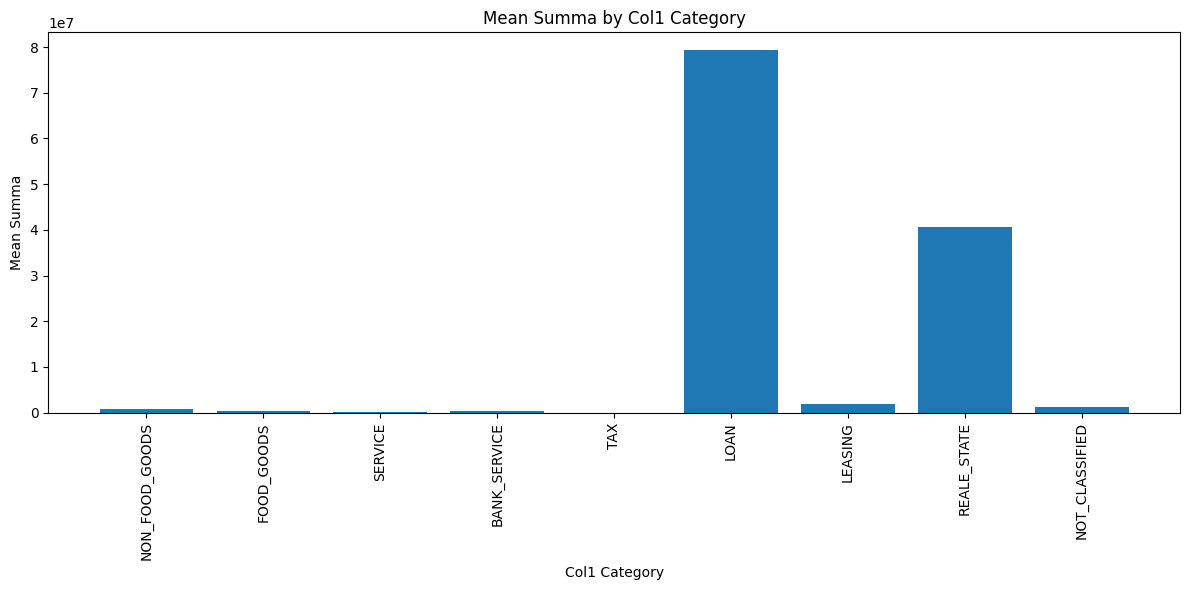

Outliers in NON_FOOD_GOODS:
16     1380000.0
27     4030000.0
33     1140000.0
48     3570000.0
54     1560000.0
158    2380000.0
159     850000.0
193    1510000.0
232    4640000.0
233    3340000.0
240    4220000.0
262    4710000.0
269    3600000.0
270    3950000.0
276    1750000.0
290    2860000.0
292    3260000.0
335    2510000.0
341    2080000.0
354    4860000.0
359    4380000.0
362    4890000.0
466    3670000.0
479    2870000.0
Name: Summa, dtype: float64
Outliers in FOOD_GOODS:
21     3540000.0
23     2220000.0
35     2750000.0
55     2060000.0
88     4250000.0
125    2130000.0
204    3430000.0
220    3780000.0
275    1950000.0
326    1090000.0
330    4650000.0
368    4080000.0
386    1500000.0
497    2870000.0
Name: Summa, dtype: float64
Outliers in SERVICE:
70      840000.0
237    2580000.0
242    1020000.0
319     990000.0
Name: Summa, dtype: float64
Outliers in BANK_SERVICE:
10     1060000.0
151    1260000.0
332    3560000.0
405    3700000.0
437    2530000.0
Name: Summa, dtype

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_dependencies(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file, sep=',', encoding='utf-8')

    # Focus on Summa and Col1 columns
    df = df[['Summa', 'Col1']]

    # Group by Col1 and calculate statistics
    grouped = df.groupby('Col1')['Summa'].agg(['count', 'mean', 'median', 'std'])

    # Sort by count in descending order
    grouped = grouped.sort_values('count', ascending=False)

    # Print the results
    print(grouped)

    # Visualize the data
    plt.figure(figsize=(12, 6))
    plt.bar(grouped.index, grouped['mean'])
    plt.title('Mean Summa by Col1 Category')
    plt.xlabel('Col1 Category')
    plt.ylabel('Mean Summa')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Identify outliers
    for category in grouped.index:
        category_data = df[df['Col1'] == category]['Summa']
        q1 = category_data.quantile(0.25)
        q3 = category_data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = category_data[(category_data < lower_bound) | (category_data > upper_bound)]
        if not outliers.empty:
            print(f"Outliers in {category}:")
            print(outliers)

    # Analyze relationships between categories
    category_counts = df['Col1'].value_counts()
    category_counts = category_counts.sort_values(ascending=False)
    print("\nCategory counts:")
    print(category_counts)

    # Calculate correlation between categories
    category_dummies = pd.get_dummies(df['Col1'])
    correlation_matrix = category_dummies.corr()
    print("\nCorrelation matrix:")
    print(correlation_matrix)

# Usage
analyze_dependencies('output.csv')


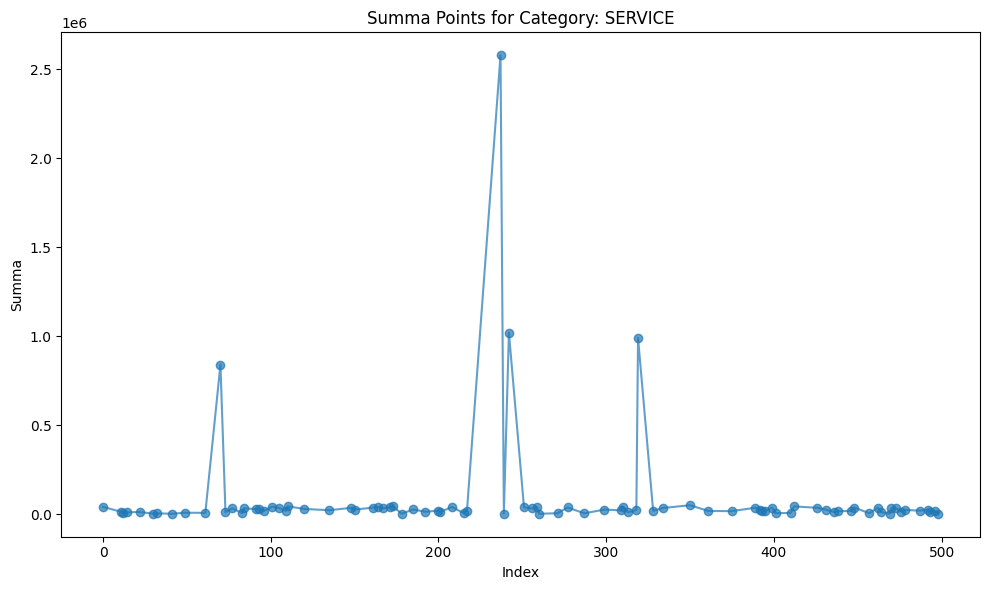

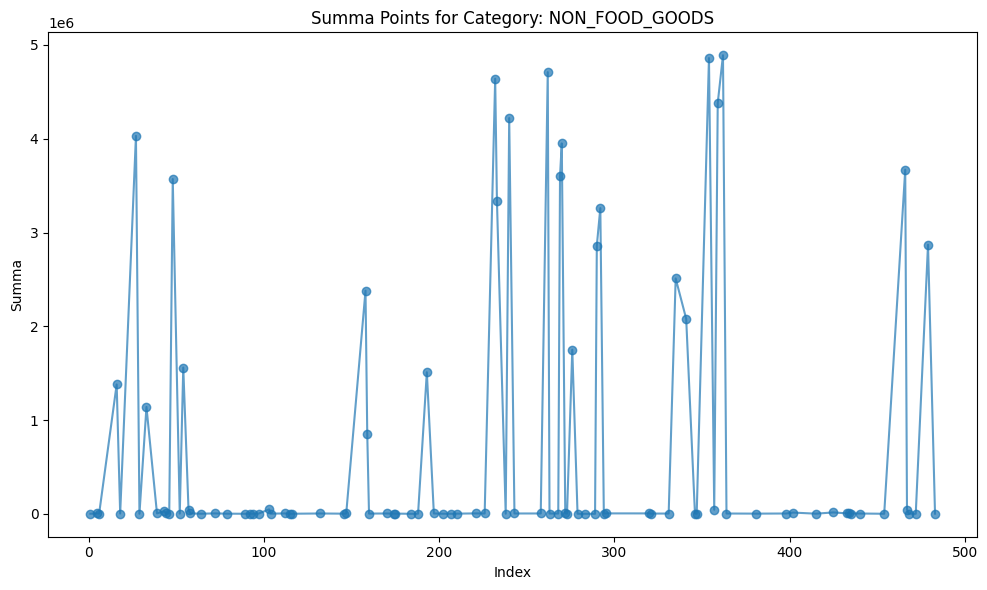

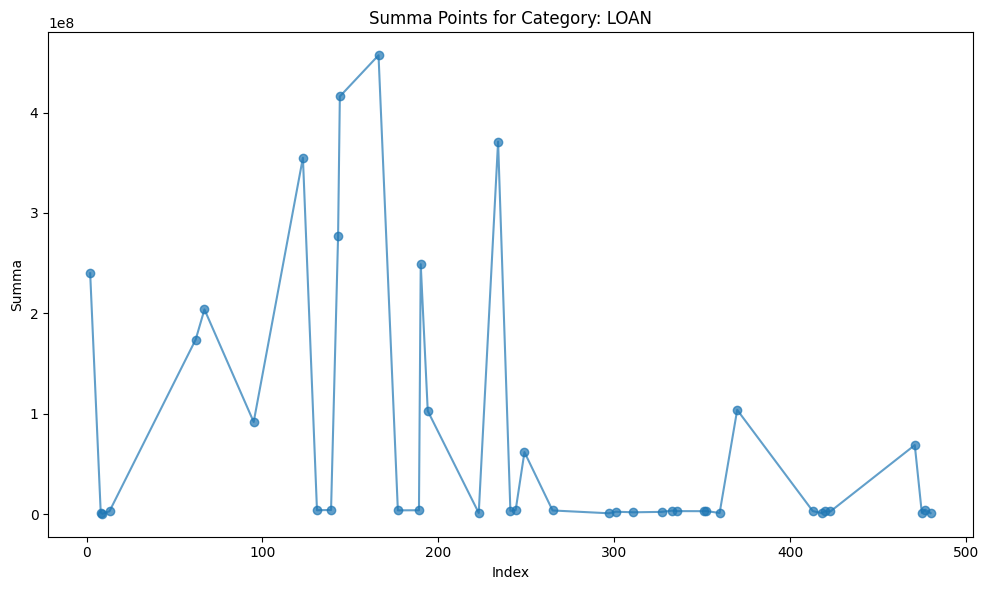

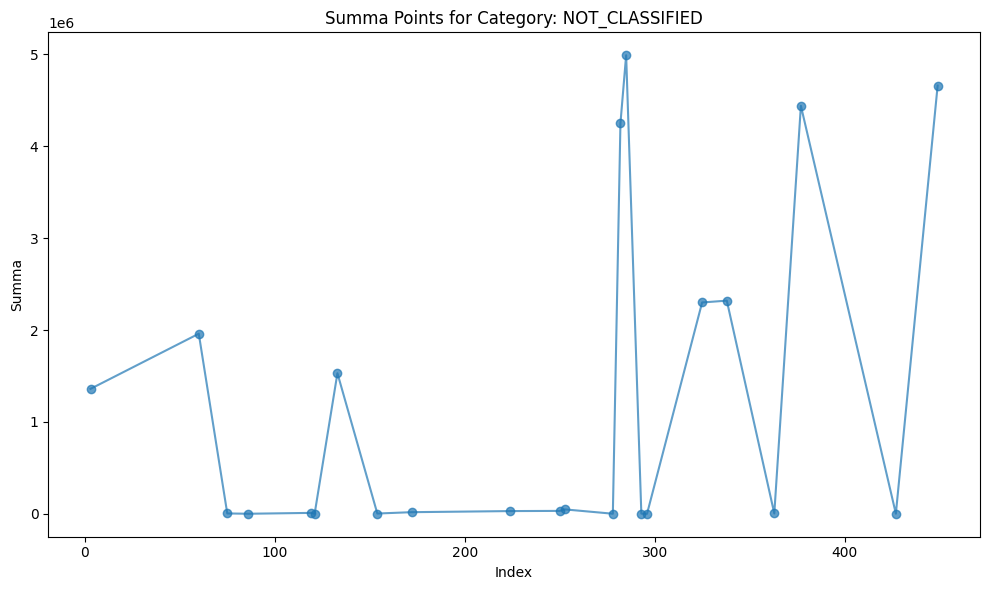

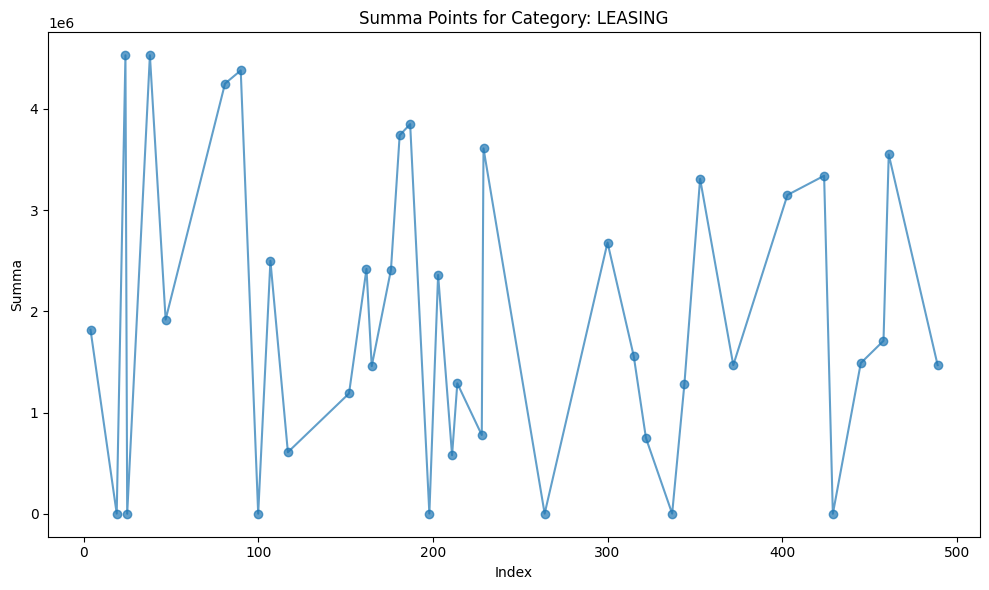

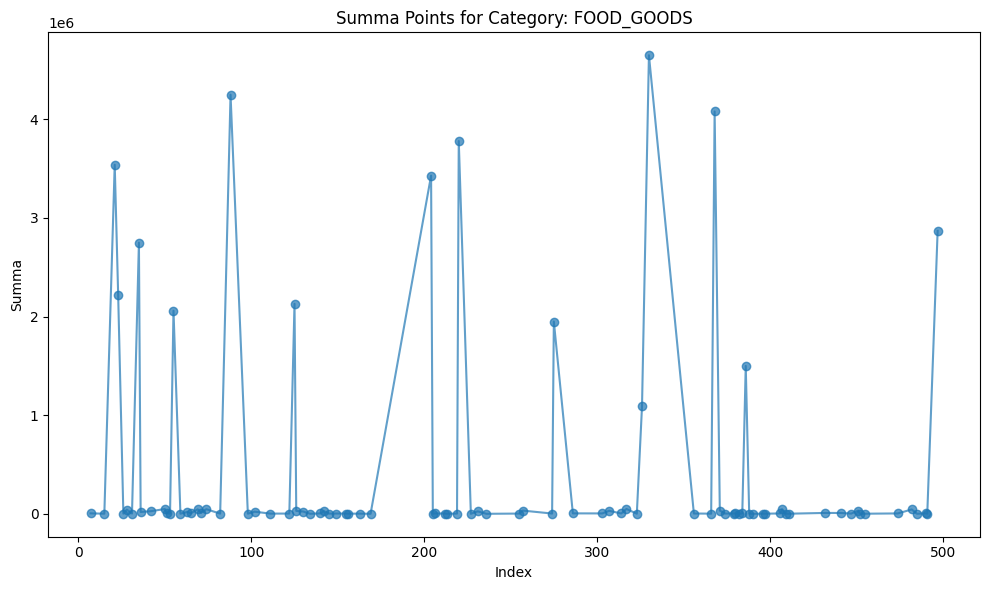

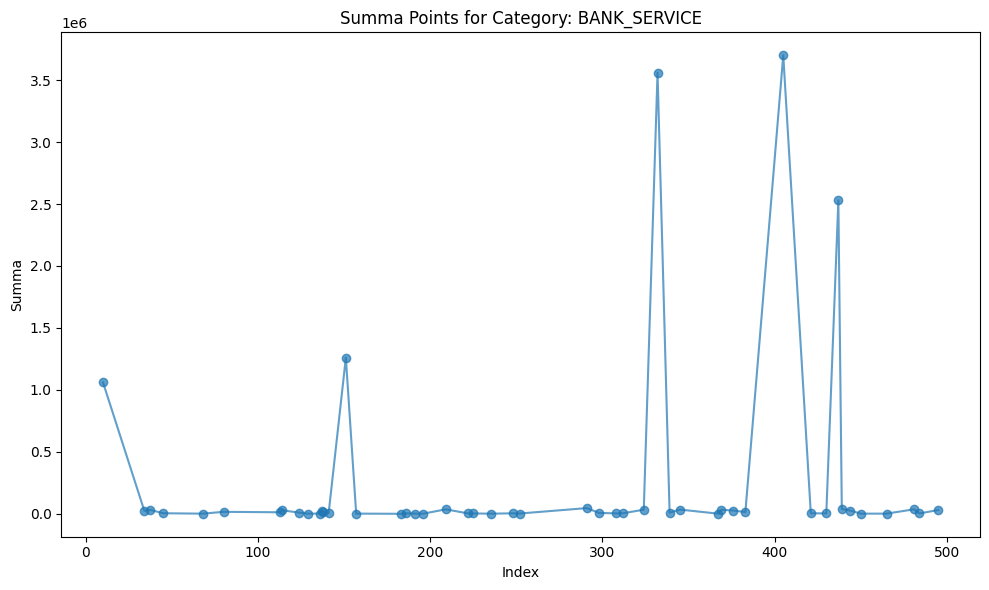

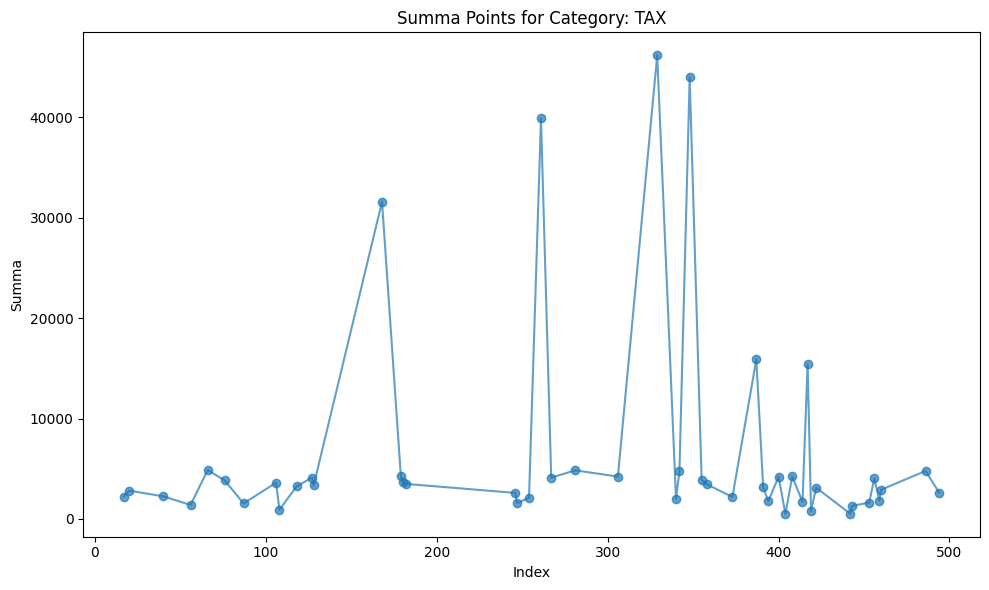

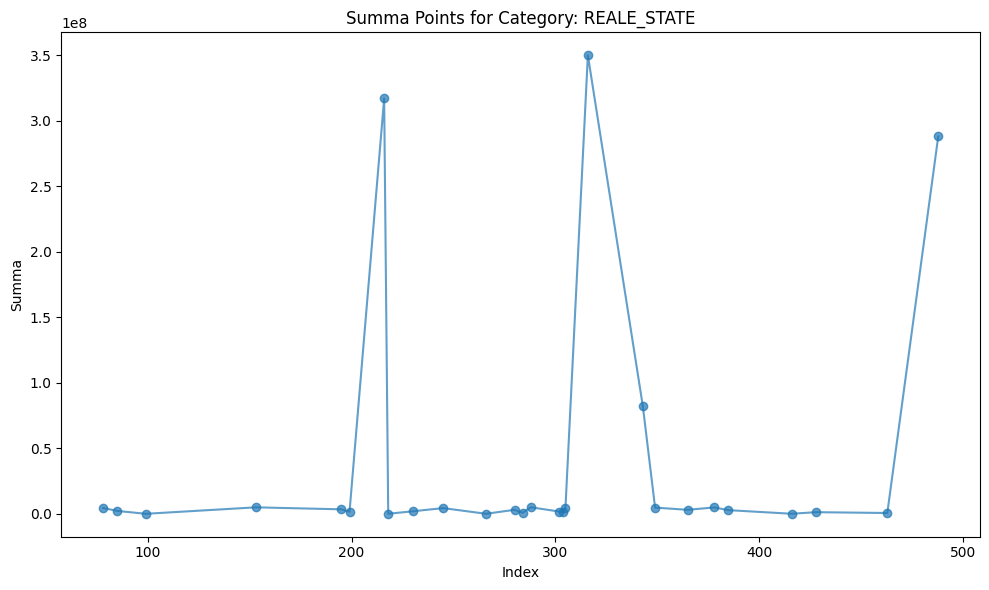

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_summa_by_index_for_each_category(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file, sep=',', encoding='utf-8')

    # Extract unique categories from Col1
    unique_categories = df['Col1'].unique()

    # Iterate over each category and plot
    for category in unique_categories:
        # Filter data for the current category
        category_data = df[df['Col1'] == category]

        # Create a plot for the current category
        plt.figure(figsize=(10, 6))
        plt.plot(category_data.index, category_data['Summa'], marker='o', linestyle='-', alpha=0.7)

        # Add labels and title
        plt.xlabel('Index')
        plt.ylabel('Summa')
        plt.title(f'Summa Points for Category: {category}')

        # Show the plot
        plt.tight_layout()
        plt.show()

# Usage
plot_summa_by_index_for_each_category('output.csv')


In [ ]:
import pandas as pd

def find_min_summa_per_category(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file, sep=',', encoding='utf-8')

    # Group by 'Col1' and find the minimum 'Summa' for each category
    min_summa_per_category = df.groupby('Col1')['Summa'].min()

    # Print the results
    print("Minimum Summa for each category:")
    print(min_summa_per_category)

# Usage
find_min_summa_per_category('output.csv')


Minimum Summa for each category:
Col1
BANK_SERVICE         680.0
FOOD_GOODS           660.0
LEASING             1730.0
LOAN              600000.0
NON_FOOD_GOODS       630.0
NOT_CLASSIFIED       540.0
REALE_STATE        18000.0
SERVICE             1270.0
TAX                  510.0
Name: Summa, dtype: float64
